In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("abalone.data")
data = data.set_axis(['Sex', 'Length ', 'Diameter', 'Height', 'Whole weight','Shucked weight ','Viscera weight','Shell weight','Rings'], axis=1, inplace=False)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
# ignore sex becaue is not a physical measure 
data = data.drop("Sex", axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


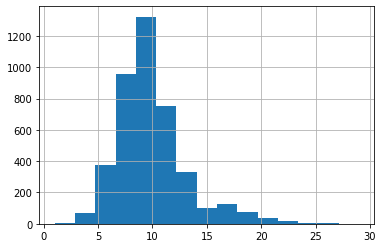

In [5]:
data["Rings"].hist(bins=15)
plt.show()

In [6]:
correlation_matrix = data.corr()
correlation_matrix["Rings"]

Length             0.557123
Diameter           0.575005
Height             0.558109
Whole weight       0.540818
Shucked weight     0.421256
Viscera weight     0.504274
Shell weight       0.628031
Rings              1.000000
Name: Rings, dtype: float64

In [7]:
x = data.drop("Rings", axis=1)
x = x.values
y = data["Rings"]
y = y.values

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [9]:
KNN = KNeighborsClassifier(5)
KNN.fit(x_train, y_train)
y_predict = KNN.predict(x_test)
evaluate = (y_predict == y_test).sum()/len(y_test)
evaluate

0.25478468899521534

## Plotting the Fit of Model

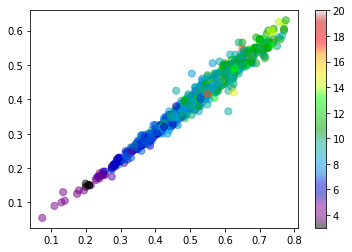

In [10]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict, s=50,alpha = 0.5, cmap="nipy_spectral")
plt.colorbar()
plt.show()

## Plotting the actual abalone data of Model

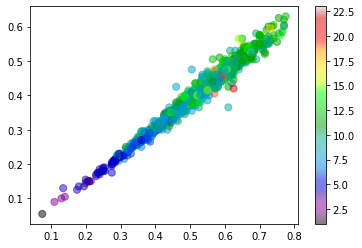

In [11]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50,alpha = 0.5, cmap="nipy_spectral")
plt.colorbar()
plt.show()